In [1]:
import numpy as np
import pylab as pl
import pandas as pd 
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
os.chdir("C:\\Users\\HP\\Desktop")

cell_df = pd.read_csv("cell_samples.csv")
cell_df


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
cell_df["Class"] = cell_df["Class"].replace([2],0) # Tumor benigno.
cell_df["Class"] = cell_df["Class"].replace([4],1)# Tumor Maligno
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


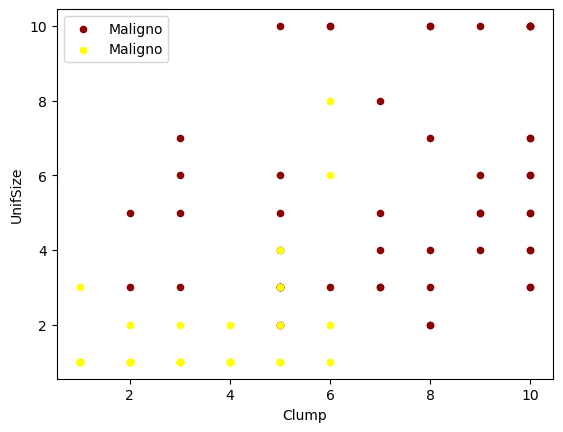

In [12]:
ax = cell_df[cell_df["Class"] ==1 ][0:50].plot(kind = "scatter", x ="Clump", y="UnifSize", color = "DarkRed", label="Maligno");
ax = cell_df[cell_df["Class"] ==0 ][0:50].plot(kind = "scatter", x ="Clump", y="UnifSize", color = "Yellow", label="Maligno", ax= ax);
plt.show()

In [13]:
# pre_procesamiento de datos y seleción
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [14]:

# Eliminación de renglones no numéricos en BareNuc
cell_df = cell_df[pd.to_numeric(cell_df["BareNuc"], errors = "coerce").notnull()]
cell_df["BareNuc"] = cell_df["BareNuc"].astype("int")
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [17]:
feature_df = cell_df[["Clump","UnifSize","UnifShape","MargAdh","SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit"]]
x = np.asarray(feature_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [19]:
cell_df["Class"] = cell_df["Class"].astype("int")
y = np.asarray(cell_df["Class"])
y[0:5]

array([0, 0, 0, 0, 0])

In [20]:
# Creación de grupos de entrenamiento y prueba.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)
print("Grupo de entrenamiento", x_train.shape, y_train.shape)
print("grupo de prueba", x_test.shape, y_test.shape)

Grupo de entrenamiento (546, 9) (546,)
grupo de prueba (137, 9) (137,)


Modelacion con svm

Opciones de kernel(Transformaciónes)
1.Linear
2.Polynomial
3.Radial Basis Function (RBF)
4.Sigmoid

In [22]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf")
clf.fit(x_train,y_train)

SVC()

In [23]:
#Predicción para la base de prueba
yhat = clf.predict(x_test)
yhat[0:5]

array([0, 1, 0, 1, 0])

In [24]:
# Creasión de matriz de confución
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x)
cm = confusion_matrix(y_test,yhat)
cm

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [25]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1])

In [26]:
yhat

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1])

In [28]:
z = y_test - yhat
z

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

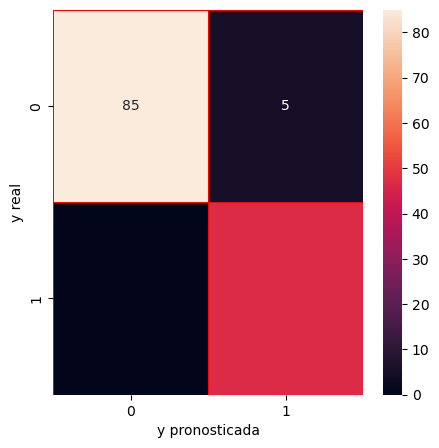

In [33]:
# Vizualisación de matriz de confusión
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax= ax)
plt.xlabel("y pronosticada")
plt.ylabel("y real")
plt.show()

Estadisticas de desempeño

In [37]:
from sklearn.metrics import classification_report
cnf_metrix = confusion_matrix(y_test, yhat, labels=[0,1])
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        90
           1       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



# Determinasión de niveles de presición
la precision = Porcentaje de predicciones correctas realtivas al total de predicciones
* El total se calcular por colmna

* Se contesta a la pregunta: ¿Qué porcentaje de veces que hacemos un pronóstico de cierto tipo éste es correcto?

In [38]:
precisionbenigno = cm[0,0] / (cm[0,0] + cm[1,0])
precisionbenigno

1.0

In [39]:
precisionmaligno = cm[1,1] / (cm[1,1] + cm[0,1])
precisionmaligno 

0.9038461538461539

# Determinación de niveles de Recuperación(Recall)
La recuperacion = Porcentaje de predicciones correctas relativas al total de valores reales
* El total se calcular por renglon
* Se contesta a la pregunta: ¿Qué porcentaje de las veces que se tiene un valor es de identificarlo?

In [40]:
recallbenigno = cm[0,0] / (cm[0,0] + cm[0,1])
recallbenigno

0.9444444444444444

In [42]:
recallmaligno = cm[1,1] / (cm[1,0] + cm[1,1])
recallmaligno 

1.0

# Determinación del Score F-1
F1 score = es la media armonica ponderada de la precisión y la recuperación. Cuanto más se acerque a 1 mejor será el modelo.
F1 score = 2*(Precisión*Recall)/(precisión + Recall)

In [44]:
f1Benigno = 2* (precisionbenigno * recallbenigno) / (precisionbenigno + recallbenigno)
f1Benigno

0.9714285714285714

In [45]:
f1Maligno = 2* (precisionmaligno * recallmaligno) / (precisionmaligno + recallmaligno)
f1Maligno

0.9494949494949495

# Determinación de Soportes
Soporte = Número de observaciones que pertenecen en forma real a cada clase posible(Total de renglon)

In [46]:
soportebenigno = cm[0,0] + cm[0,1]
soportebenigno

90

In [47]:
soportemaligno = cm[1,0] + cm[1,1]
soportemaligno

47

# Determinación de Precisión Global(Accuracy)
Accuracy = Porcentaje de predicciones correctas.

In [48]:
correctos = cm[0,0] + cm[1,1]
incorrectos = cm[0,1] + cm[1,0]
PrecisiónGlobal = correctos / (correctos + incorrectos)
PrecisiónGlobal

0.9635036496350365

# Promedios simples por indicador ( Macro Average)
Promedio simples por Precisión, Recuperación y F1 score

In [49]:
MacroAvPre = (precisionbenigno + precisionmaligno) / 2
MacroAvPre

0.9519230769230769

In [50]:
MacroAvReC = (recallbenigno + recallmaligno) / 2
MacroAvReC

0.9722222222222222

In [52]:
MacroF1S = (f1Benigno + f1Maligno) / 2
MacroF1S

0.9604617604617605

# Promedios ponderados por indicador(Weight Average)
Promedios ponderados de acuerdo al soporte por indicador

In [53]:
pesobenigno = soportebenigno / (soportebenigno + soportemaligno)
pesomaligno = soportemaligno / (soportebenigno + soportemaligno)

In [54]:
WAvgPrecision = precisionbenigno * pesobenigno + precisionmaligno * pesomaligno
WAvgPrecision

0.967012914093206

In [55]:
WAvgRecall = recallbenigno * recallbenigno + recallmaligno * recallmaligno
WAvgRecall

1.8919753086419753

In [57]:
WAvgf1 = f1Benigno * f1Benigno + f1Maligno * f1Maligno
WAvgf1

1.8452141285041717

# Prueba de svm con Kernel Lineal

In [58]:
clf = svm.SVC(kernel = "linear")
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x)

cm= confusion_matrix(y_test, yhat)
cm

array([[85,  5],
       [ 0, 47]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report
cnf_metrix = confusion_matrix(y_test, yhat, labels=[0,1])

print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        90
           1       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



# Prueba de SVM con kernel polinomial


In [60]:
clf = svm.SVC(kernel = "poly")
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x)

cm= confusion_matrix(y_test, yhat)
cm

array([[86,  4],
       [ 0, 47]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report
cnf_metrix = confusion_matrix(y_test, yhat, labels=[0,1])

print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        90
           1       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137



# Prueba de SVM con Kernel Sigmoide

In [62]:
clf = svm.SVC(kernel = "sigmoid")
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x)

cm= confusion_matrix(y_test, yhat)
cm

array([[54, 36],
       [47,  0]], dtype=int64)

In [63]:
from sklearn.metrics import classification_report
cnf_metrix = confusion_matrix(y_test, yhat, labels=[0,1])

print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.53      0.60      0.57        90
           1       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

